<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# CP4. [실습] 데이터 전처리와 시각화: COVID19

- 본 실습은 간단한 데이터 시각화 방법을 직접 체험하기 위한 것입니다.
- 차트를 화려하게 꾸미는데 목적을 두지 말고 전처리 부분에 중점을 두는 것이 좋습니다.
- 우선 다음과 같은 과정으로 데이터 시각화를 수행함으로 알고 진행하기 바랍니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/visualization.png' width="650" align="left">

In [0]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline   
%config InlineBackend.figure_format = 'retina'

## 1. 데이터 불러오기

- **read_csv()** 함수를 사용해 분석할 데이터를 csv 파일에서 불러옵니다.
- 데이터프레임 이름은 **covid19**로 합니다.
- 한글이 포함된 CSV 파일은 **encoding='CP949'**을 지정해 읽어옵니다.
- covid19.csv 데이터 셋은 국내 코로나 확진자 수를 제공합니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/covid19.csv'
- 데이터 출처: ko.wikipedia.org/wiki/대한민국의_코로나바이러스감염증-19_범유행

In [0]:
# 파일 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/covid19.csv'
covid19 = pd.read_csv(file_path, encoding='CP949')

## 2. 데이터 확인

- 데이터를 알아야 데이터를 분석할 수 있습니다.
- 우선 분석할 데이터가 어떤 형태의 데이터인지 확인합니다.

**1) 상위/하위 데이터 확인**

- **head()**, **tail()** 메소드로 상/하위 데이터를 확인합니다.
- 괄호 안에 수를 지정하지 않으면 5가 기본값으로 사용됩니다.

In [46]:
# 상위 5개 행 확인
covid19.head()

,Date,Confirmer
0,01월 20일,1 (+1)
1,01월 21일,1 (+0)
2,01월 22일,1 (+0)
3,01월 23일,1 (+0)
4,01월 24일,2 (+1)


In [47]:
# 하위 5개 행 확인
covid19.tail()

,Date,Confirmer
110,05월 09일,"10,840 (+18)"
111,05월 10일,"10,874 (+34)"
112,05월 11일,"10,909 (+35)"
113,05월 12일,"10,936 (+27)"
114,05월 13일,"10,962 (+26)"


**2) 열 데이터 개수, NaN 값 여부 확인**

- **info()** 메소드로 각 열의 값 개수, **NaN**값 포함 여부를 확인합니다.
- NaN값이 포함되어 있으면 결측치에 대한 해결(제거 또는 변경)이 필요합니다.

In [48]:
# 열 정보, NaN 값 포함 여부 확인
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       115 non-null    object
 1   Confirmer  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


**3) 기초 통계 정보 확인**

- **describe()** 메소드를 사용해 기초 통계 정보를 확인합니다.

In [49]:
# 기초 통계 정보 확인
covid19.describe()

,Date,Confirmer
count,115,115
unique,115,108
top,02월 10일,28 (+0)
freq,1,4


**4) 질문**

- covid19 데이터가 분석하기에 적절한 형태인가요?
- covid19 데이터에 대해 어떤 분석이 의미가 있을까요?
- 분석에 걸림돌이 될 만한 것은 무엇일까요?
- 분석을 위해 우선 어떤 처리를 해야 할까요?

## 3. 데이터 전처리

- NaN 값이 포함된 열이 있으면 제거하거나 다른 값으로 채워야 합니다.
- 중복된 데이터는 정확한 분석을 방해하므로 제거해야 합니다.
- 기타 데이터에 방해가 되는 요소를 전처리 과정에서 제거합니다.

**1) 날짜 처리**
- **01월 20일** 형태의 데이터에서 **2020-01-20** 형태의 데이터를 만들어야 합니다.

**문자열 분리**

- 우선 **split()** 메소드를 이용해 **공백**을 기준으로 문자열을 분리합니다.
- **expand=True**를 지정해 분리된 결과가 데이터프레임이 되게 합니다.

In [50]:
# 날짜 분리
covid19['Date'].str.split(' ', expand=True)

,0,1
0,01월,20일
1,01월,21일
2,01월,22일
3,01월,23일
4,01월,24일
...,...,...
110,05월,09일
111,05월,10일
112,05월,11일
113,05월,12일


- 문자열이 잘 나뉘어지니 이 결과를 **mmdd** 데이터프레임으로 저장합니다.

In [51]:
# 데이터프레임 만들기
mmdd = covid19['Date'].str.split(' ', expand=True)

# 확인
mmdd.head()

,0,1
0,01월,20일
1,01월,21일
2,01월,22일
3,01월,23일
4,01월,24일


- mmdd 데이터프레임 열 이름을 **month**, **day**로 변경합니다.
- 전체 열 이름을 변경할 때는 **rename()** 메소드 보다 **columns** 속성을 변경함이 편리합니다.

In [0]:
# 열 이름 변경
mmdd.columns = ['month', 'day']

- 결과를 확인합니다.

In [53]:
# 확인
mmdd.head()

,month,day
0,01월,20일
1,01월,21일
2,01월,22일
3,01월,23일
4,01월,24일


**날짜 만들기**

- 이제 mmdd 데이터프레임 데이터로 **yyyy-mm-dd** 형태의 날짜를 만듭니다.
- **문자열 슬라이싱**으로 month 열에서 앞 두 글자, day 열에서 앞 두 글자를 추출해서 연결하면 됩니다.
- 데이터프레임 열에 대한 문자열 슬라이싱은 **str[:2]** 형태로 처리합니다.
- 2020-01-20 형태가 되도록 앞에 2000과 중간 중간에 구분자 - 를 추가합니다.
- 우선 날짜가 잘 만들어지나 확인합니다.

In [54]:
# yyyy-mm-dd 형태의 날짜 만들기
'2020'+'-'+mmdd['month'].str[:2]+'-'+mmdd['day'].str[:2]

0      2020-01-20
1      2020-01-21
2      2020-01-22
3      2020-01-23
4      2020-01-24
          ...    
110    2020-05-09
111    2020-05-10
112    2020-05-11
113    2020-05-12
114    2020-05-13
Length: 115, dtype: object

- 날짜가 잘 만들어지니 covid19 데이터프레임에 **Date** 열에 즉시 반영합니다.

In [55]:
# 데이터프레임에 반영
covid19['Date'] = '2020'+'-'+mmdd['month'].str[:2]+'-'+mmdd['day'].str[:2]

# 확인
covid19.head()

,Date,Confirmer
0,2020-01-20,1 (+1)
1,2020-01-21,1 (+0)
2,2020-01-22,1 (+0)
3,2020-01-23,1 (+0)
4,2020-01-24,2 (+1)


**2) 확진자 수 처리**

- **1 (+1)** 형태로 누적 확진자 수와 일별 확진자 수가 문자열로 존재합니다.
- 누적 확진자 수와 일별 확진자 수를 분리해 저장해야 합니다.

**문자열 분리**

- 우선 **(** 기호를 구분자로 문자열을 분리해 **cnt** 데이터프레임을 만듭니다.

In [56]:
# 문자열 분리해 데이터프레임 만들기
cnt = covid19['Confirmer'].str.split('(', expand=True)

# 확인
cnt.head()

,0,1
0,1,+1)
1,1,+0)
2,1,+0)
3,1,+0)
4,2,+1)


- cnt 데이터프레임 열 이름을 **cumulative**, **daily**로 변경합니다.

In [57]:
# 열 이름 변경
cnt.columns = ['cumulative', 'daily']

# 확인
cnt.head()

,cumulative,daily
0,1,+1)
1,1,+0)
2,1,+0)
3,1,+0)
4,2,+1)


**숫자 처리**

- 숫자에 포함된 **콤마(,)**와 **)** 문자를 제거해야 합니다.
- 우선 cumulative 열의 콤마를 제거합니다.
- **replace()** 메소드를 사용하는데, 데이터프레임 열에 사용할 때는 **str.replace()** 형태로 사용합니다.

In [58]:
# 하위 5개 행 확인
cnt.tail()

,cumulative,daily
110,"10,840",+18)
111,"10,874",+34)
112,"10,909",+35)
113,"10,936",+27)
114,"10,962",+26)


In [59]:
# cumulative 열 콤마 제거
cnt['cumulative'] = cnt['cumulative'].str.replace(',', '')

# 확인
cnt.tail()

,cumulative,daily
110,10840,+18)
111,10874,+34)
112,10909,+35)
113,10936,+27)
114,10962,+26)


- 같은 방법으로 **daily** 열의 **)** 를 제거합니다.

In [60]:
# daily 열 괄호 제거
cnt['daily'] = cnt['daily'].str.replace(')', '')

# 확인
cnt.tail()

,cumulative,daily
110,10840,+18
111,10874,+34
112,10909,+35
113,10936,+27
114,10962,+26


- **daily** 열에도 천명이 넘어 콤마가 있는 데이터가 있으니 **콤마(,)**를 제거합니다.

In [61]:
# daily 열 콤마 제거
cnt['daily'] = cnt['daily'].str.replace(',', '')

# 확인
cnt.tail()

,cumulative,daily
110,10840,+18
111,10874,+34
112,10909,+35
113,10936,+27
114,10962,+26


- **cumulative**, **daily** 열의 데이터 형식을 **정수**로 변경합니다.

In [62]:
# cumulative 열 정수로 변환
cnt['cumulative'] = cnt['cumulative'].astype(int)

# 확인
cnt.tail()

,cumulative,daily
110,10840,+18
111,10874,+34
112,10909,+35
113,10936,+27
114,10962,+26


In [63]:
# daily 열 정수로 변환
cnt['daily'] = cnt['daily'].astype(int)

# 확인
cnt.tail()

,cumulative,daily
110,10840,18
111,10874,34
112,10909,35
113,10936,27
114,10962,26


- **pd.to_datetime()** 함수를 사용해 **covid19** 데이터프레임의 **Date** 열을 **datetime** 형으로 변경합니다. 

In [0]:
# datetime 형으로 변경
covid19['Date'] = pd.to_datetime(covid19['Date'])

**데이터프레임에 연결**

- **concat()** 함수를 사용해서 **covid19** 데이터프레임에 **cnt** 데이터프레임을 연결합니다.

In [65]:
# 데이터프레인 연결
covid19 = pd.concat([covid19, cnt], axis=1)

# 확인
covid19.head()

,Date,Confirmer,cumulative,daily
0,2020-01-20,1 (+1),1,1
1,2020-01-21,1 (+0),1,0
2,2020-01-22,1 (+0),1,0
3,2020-01-23,1 (+0),1,0
4,2020-01-24,2 (+1),2,1


- 분석의 편의를 위해 **Date** 열 이름을 소문자로 변경합니다.

In [66]:
# 열 이름 소문자로 변경
#covid19.columns = covid19.columns.str.lower()
covid19.rename(columns={'Date': 'date'}, inplace=True)

# 확인
covid19.head()

,date,Confirmer,cumulative,daily
0,2020-01-20,1 (+1),1,1
1,2020-01-21,1 (+0),1,0
2,2020-01-22,1 (+0),1,0
3,2020-01-23,1 (+0),1,0
4,2020-01-24,2 (+1),2,1


**3) 불필요한 열 제거**

- **Confirmer** 열은 더 이상 필요가 없으니 제거합니다.

In [68]:
# Confirmer 열 제거
covid19.drop(['Confirmer'], axis=1, inplace=True)

# 확인
covid19.head()

,date,cumulative,daily
0,2020-01-20,1,1
1,2020-01-21,1,0
2,2020-01-22,1,0
3,2020-01-23,1,0
4,2020-01-24,2,1


## 4. 데이터 시각화

- 이제 전처리가 진행된 데이터를 시각화해서 분석합니다.

**1) 일별 확진자수 변화**

- 매일 확진자 수를 라인 그래프로 표시합니다.

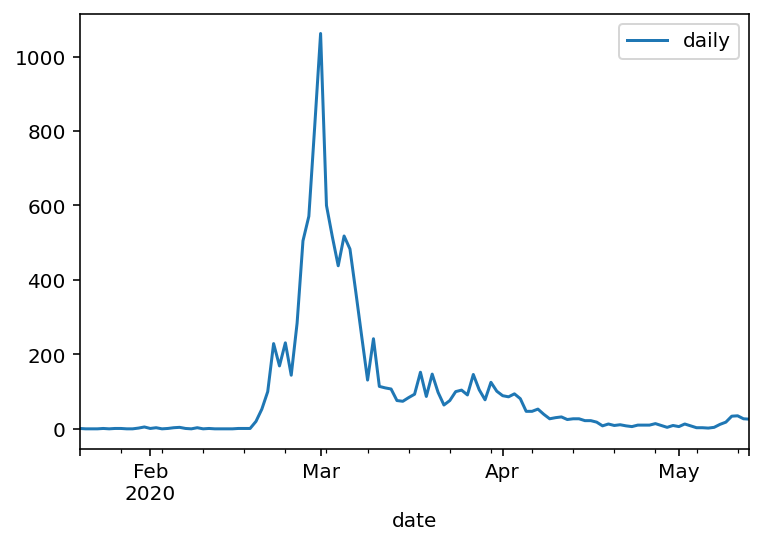

In [80]:
# 일별 확진자 수
covid19.plot(kind='line', x='date', y='daily')
plt.show()

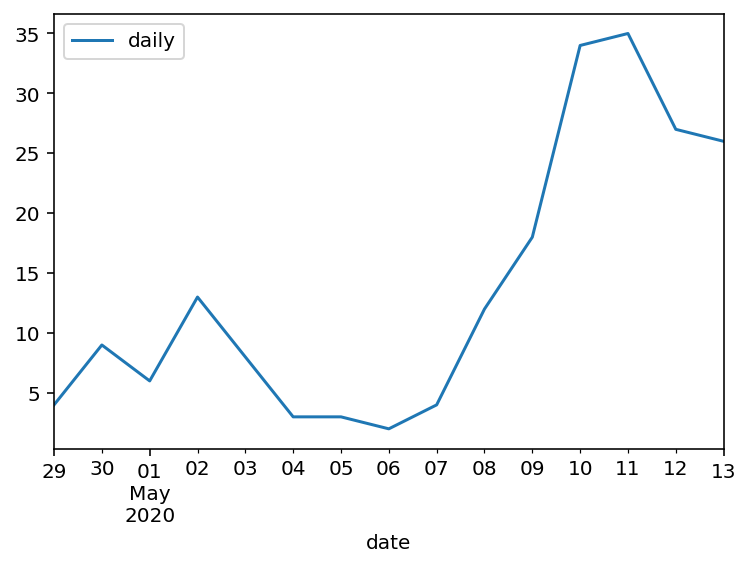

In [79]:
# 최근 15일 일별 확진자 수
covid19.tail(15).plot(kind='line', x='date', y='daily')
plt.show()

**2) 누적 확인자 수 현황**

- 누적 확진자 수를 라인 그래프로 표시합니다.

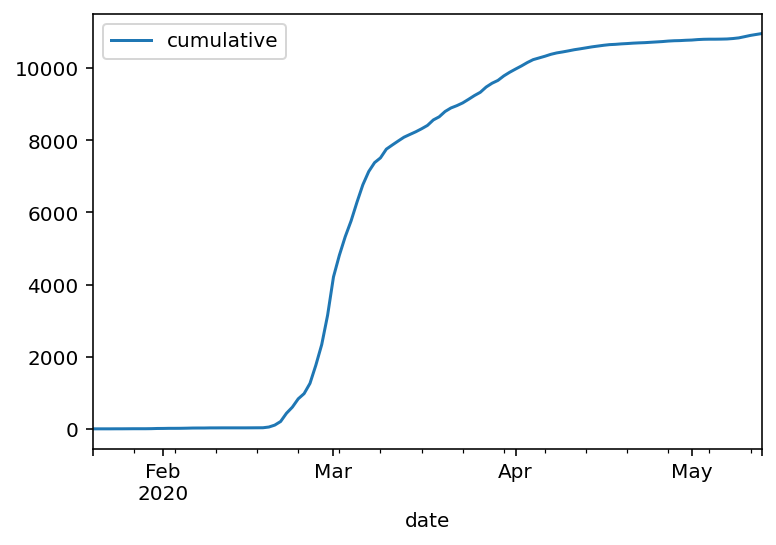

In [82]:
# 누적 확진자 수
covid19.plot(kind='line', x='date', y='cumulative')
plt.show()

## 5. 의미 찾기

- 건강한 대한민국이 되었으면 좋겠습니다.
- 우리 모두 화이팀! 대한민국 화이팅!

## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>